# Analyzing Hate Speech and Offensive Language in Tweets | classification Project

## Introduction

Analysing hate speech and offensive language in tweets

This dataset consists of roughly 5,600 tweets containing instances of hate speech and offensive language. These tweets have been curated to provide a focused dataset for building sentiment analysis and toxicity detection models. Each tweet reflects varying degrees of negativity, from casual derogatory remarks to explicit expressions of prejudice and intolerance.

By examining this dataset, we aim to understand the prevalence and patterns of hate speech and offensive language in online discourse. Through data analysis, we seek insights into the factors driving such language, as well as its impact on digital communities. Ultimately, our goal is to develop tools and strategies for mitigating the spread of harmful language online and fostering a more inclusive and respectful online environment.

In [1]:
import pandas as pd
tweets_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/toxicity_tweets_cleaned.csv', index_col=0)
tweets_df

,Tweet,Toxicity
43039,i will beat a bitch ass tf,1
36956,thomasnye1 my momma saw how the girls danced a...,1
8373,user user dont forget his other incantation i...,0
27287,isnt it sad how i keep thinking youll change ...,0
56311,please tell this bitch im subbin her ik one of...,1
...,...,...
6429,animaladvocate melodylgattenby zoo says this ...,0
12737,alice doggy my petstagram instapets pet pets d...,0
12503,h a p p y w i n e p a r t y momentoafouna...,0
53172,stupid teabagger restaurant making customers p...,1


## Classification Models

We are tasked with building multiple classifier models to predict whether a given tweet contains hate speech or offensive language. Our dataset consists of roughly 5,600 tweets, each accompanied by a label indicating whether it expresses toxicity.

The objective is to develop robust machine learning models capable of accurately classifying tweets as toxic or non-toxic based on their content.

### Pre-Processing
Before we can build our models, we need to first preprocess the text data. Preprocessing involves converting the text into a format that can be easily understood by the algorithms. Use `CountVectorizer` to transform the text data into a matrix where each row represents a tweet and each column represents a unique word in the vocabulary.

Split the dataset into training and testing sets using a `80-20 split`.

In [ ]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download(["stopwords", "punkt_tab", "wordnet"])

lemmatizer = WordNetLemmatizer()

# Cleaning function
def text_clean (text):
  text = text.lower()
  text = re.sub(r"http\S+|www\S+", "", text)
  text = re.sub(r"@\w+|#\w+", "", text)
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(text) for word in tokens if word not in stopwords.words("english")]
  return " ".join(tokens)

# Apply Cleaning to the dataset
tweets_df["clean_tweet"] = tweets_df['Tweet'].apply(text_clean)

# Apply CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets_df["clean_tweet"])
X_array = X.toarray()
y = tweets_df["Toxicity"]

X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
X_train.shape

(4539, 13576)

### Exercise 2

Now we can build classifier models using the training data and assess their performance on the testing data.

Implement the following models: `Logistic Regression`, `Decision Tree`, `Support Vector Classification`, and `Nearest Neighbors`. Evaluate each model's performance using the following evaluation metrics: `accuracy`, `precision`, `recall`, and `F1 score`. Note: Running these models might take a few minutes, depending on the complexity chosen.

In addition to this, calculate the confusion matrix for each of our models.

What do these results tell us about our models?

In [ ]:
#Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


classifiers = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Decision Tree" : DecisionTreeClassifier(max_depth = 5),
    "SVC (linear)" : SVC(kernel = "linear", C=0.025),
    "SVC (RBF)" : SVC(kernel = "rbf", gamma = 2, C=1),
    "Nearest Neighbors" : KNeighborsClassifier(n_neighbors=5)
    }

result = {}

# Training and Evaluation of each models
for name, model in classifiers.items():
  # Training models
  print(f"Training {name} model ...")
  model.fit(X_train, y_train)
  # Predicting values
  y_pred = model.predict(X_train)
  # Evaluating models
  accuracy = accuracy_score(y_train, y_pred)
  precision = precision_score(y_train, y_pred, average="weighted")
  recall = recall_score(y_train, y_pred, average="weighted")
  F1_score = f1_score(y_train, y_pred, average="weighted")
  print(f"{name} model trained successfully")

  result[name] = {
      "Accuracy" : accuracy,
      "Precision" : precision,
      "Recall" : recall,
      "F1_Score" : F1_score
      }



Training Logistic Regression model ...
Logistic Regression model trained successfully
Training Decision Tree model ...
Decision Tree model trained successfully
Training SVC (linear) model ...
SVC (linear) model trained successfully
Training SVC (RBF) model ...
SVC (RBF) model trained successfully
Training Nearest Neighbors model ...
Nearest Neighbors model trained successfully


Text(0.5, 0, 'F1_Scores')

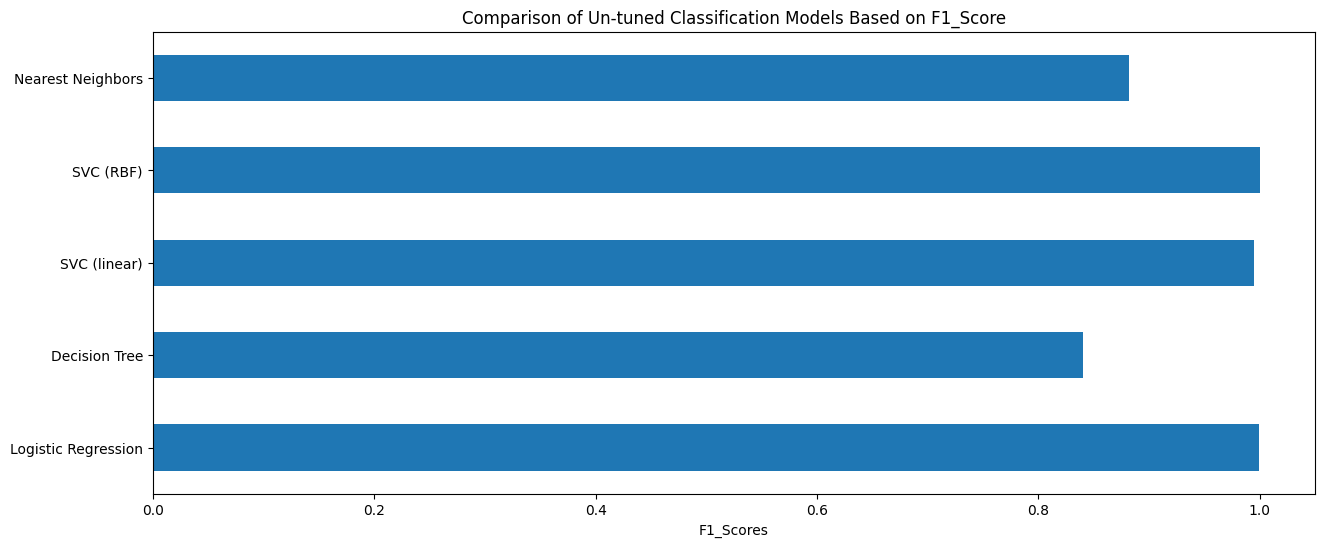

In [ ]:
import matplotlib.pyplot as plt
result_df = pd.DataFrame(result).T

fig, ax = plt.subplots(figsize = (15,6))
result_df["F1_Score"].plot(kind = "barh", ax = ax)

plt.title("Comparison of Un-tuned Classification Models Based on F1_Score")
plt.xlabel("F1_Scores")

### Exercise 3
In addition to the performance evaluation based on metrics and confusion matrices, cross-validation scores provide further insights into the robustness and generalisation capabilities of classifier models.

After evaluating the performance of our classifier models, we want to determine the best model based on their cross-validation scores.

Perform 5-fold cross-validation for each classifier model using the training data and print the `mean cross-validation score`.

**Note**: This code should take a few minutes to run

In [ ]:
#Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grids for each model
# Correct the parameter grids to include only valid parameters for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15, None],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "SVM (Linear Kernel)": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM (RBF Kernel)": {
        "C": [0.01, 0.1, 1, 10],
        "gamma": ["scale", "auto"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    }
}

# Store best models and their performance
best_models = {}
best_results = {}

for name, param_grid in param_grids.items():
    print(f"🔍 Tuning {name} with params: {param_grid}")  # Debugging print

    if name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    elif name == "Decision Tree":
        model = DecisionTreeClassifier()
    elif name == "SVM (Linear Kernel)":
        model = SVC(kernel="linear")
    elif name == "SVM (RBF Kernel)":
        model = SVC(kernel="rbf")
    elif name == "K-Nearest Neighbors":
        model = KNeighborsClassifier()

    # Verify correct parameter grid is used
    print(f"Using {name} with param grid: {param_grid}")

    # Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_weighted", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Make predictions with best model
    y_pred = best_model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    best_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Best Params": grid_search.best_params_
    }

# Convert results to DataFrame for comparison
best_results_df = pd.DataFrame(best_results).T

# Display best hyperparameters and performance
print(best_results_df)

🔍 Tuning Logistic Regression with params: {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
Using Logistic Regression with param grid: {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
🔍 Tuning Decision Tree with params: {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
Using Decision Tree with param grid: {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
🔍 Tuning SVM (Linear Kernel) with params: {'C': [0.01, 0.1, 1, 10]}
Using SVM (Linear Kernel) with param grid: {'C': [0.01, 0.1, 1, 10]}
🔍 Tuning SVM (RBF Kernel) with params: {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}
Using SVM (RBF Kernel) with param grid: {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}
🔍 Tuning K-Nearest Neighbors with params: {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
Using K-Nearest Neighbors with param grid: {'n_neighbors': [3, 5, 7, 9], 'weights': ['unif

In [ ]:
# Convert results to DataFrame for comparison
best_results_df

,Accuracy,Precision,Recall,F1-Score,Best Params
Logistic Regression,0.913656,0.915565,0.913656,0.912888,"{'C': 0.1, 'solver': 'liblinear'}"
Decision Tree,0.903084,0.903514,0.903084,0.902552,"{'criterion': 'gini', 'max_depth': None, 'min_..."
SVM (Linear Kernel),0.904846,0.906769,0.904846,0.903956,{'C': 0.01}
SVM (RBF Kernel),0.9163,0.918376,0.9163,0.915536,"{'C': 10, 'gamma': 'scale'}"
K-Nearest Neighbors,0.814978,0.818586,0.814978,0.811263,"{'n_neighbors': 7, 'weights': 'distance'}"


Text(0.5, 0, 'F1_scores')

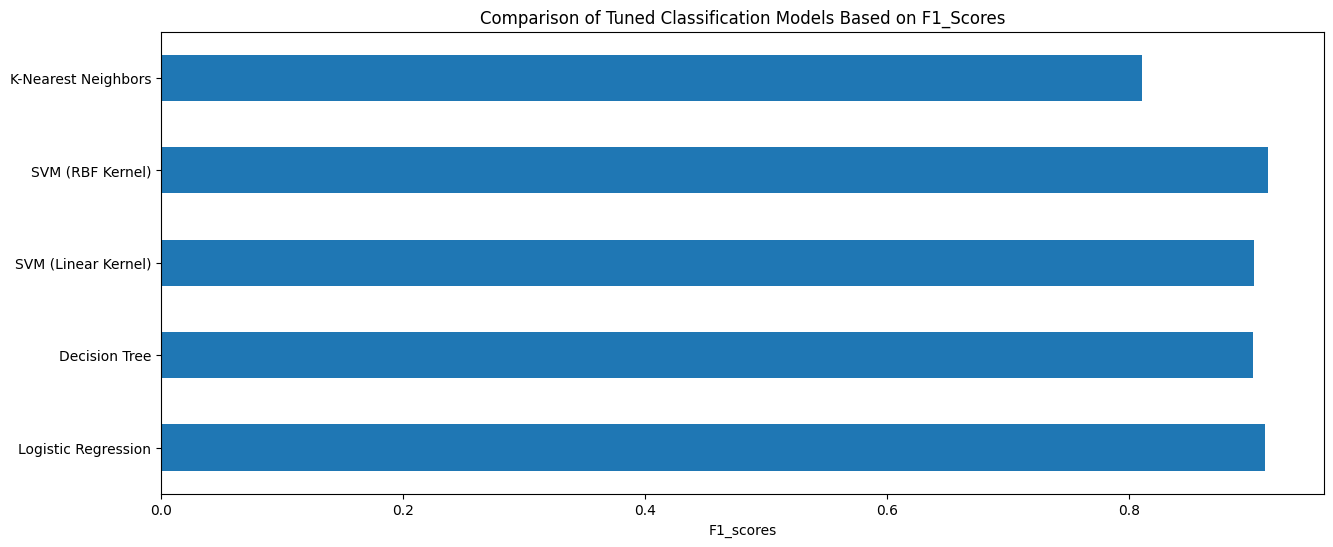

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 6))
best_results_df["F1-Score"].plot(kind ="barh", ax = ax)

plt.title("Comparison of Tuned Classification Models Based on F1_Scores")
plt.xlabel("F1_scores")


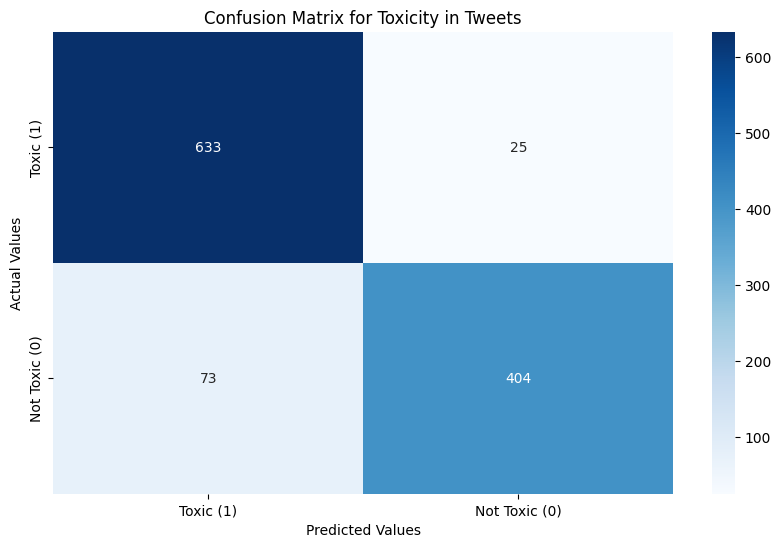

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

class_label = ["Toxic (1)", "Not Toxic (0)"]

conf = confusion_matrix(y_test, y_pred)

plt.figure (figsize = (10, 6))
sns.heatmap(conf, cmap = "Blues",annot = True, fmt= "d", xticklabels= class_label, yticklabels= class_label)
plt.title("Confusion Matrix for Toxicity in Tweets")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:

import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grids for each model
# Correct the parameter grids to include only valid parameters for each model

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15, None],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "SVM (Linear Kernel)": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM (RBF Kernel)": {
        "C": [0.01, 0.1, 1, 10],
        "gamma": ["scale", "auto"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    }
}

# Store best models and their performance
best_models = {}
best_results = {}

for name, param_grid in param_grids.items():
    print(f"🔍 Tuning {name} with params: {param_grid}")  # Debugging print

    if name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    elif name == "Decision Tree":
        model = DecisionTreeClassifier()
    elif name == "SVM (Linear Kernel)":
        model = SVC(kernel="linear")
    elif name == "SVM (RBF Kernel)":
        model = SVC(kernel="rbf")
    elif name == "K-Nearest Neighbors":
        model = KNeighborsClassifier()

    # Start time tracking
    start_time = time.time()

    # Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_weighted", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # End time tracking
    end_time = time.time()
    training_time = end_time - start_time  # Compute training duration

    # Get best model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Make predictions with best model
    y_pred = best_model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    best_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Training Time (sec)": training_time,
        "Best Params": grid_search.best_params_
    }

# Convert results to DataFrame for comparison
best_results_df = pd.DataFrame(best_results).T

# Sort by best F1-score
best_results_df = best_results_df.sort_values(by="F1-Score", ascending=False)

# Display best hyperparameters and performance
print(best_results_df)

🔍 Tuning Logistic Regression with params: {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
🔍 Tuning Decision Tree with params: {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
🔍 Tuning SVM (Linear Kernel) with params: {'C': [0.01, 0.1, 1, 10]}
🔍 Tuning SVM (RBF Kernel) with params: {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}


## Solutions

### Exercise 1

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the tweet text data
X = vectorizer.fit_transform(tweets_df['Tweet'])

# Convert the sparse matrix to an array
X_array = X.toarray()

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
# Split the data into features (X) and target labels (y)
X_train, X_test, y_train, y_test = train_test_split(X_array, tweets_df['Toxicity'], test_size=0.2, random_state=42)

X_train.shape

(4539, 14747)

### Exercise 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classification": SVC(),
    "Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
conf_matrices = {}
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

# Display results
for name, metrics in results.items():
    print(f"Metrics for {name}:")
    print(metrics)
    print()

# Display confusion matrices
for name, conf_matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    print()



Using Python (3.10.14), our results seem to be best for the Decision Tree model in terms of its F1 score, boasting high accuracy, precision, recall, comparing favourably to the other classifiers. The Logistic Regression model follows closely, with its ability to correctly classify a significant proportion of samples, coupled with balanced precision and recall metrics, also showing its robustness in handling toxic and non-toxic instances. Support Vector Classification (SVC), while exhibiting high precision, falters in recall, leading to an imbalance between false negatives and false positives. Nearest Neighbors (KNN), with the lowest accuracy and F1 score, struggles to strike a balance between precision and recall, resulting in suboptimal predictive performance.

It is however important to note a few things. Firstly, the skeleton for models provided here are only the start of the process of finding a suitable model. In reality, we cannot say with full certainty that the KNN model is less suitable than another if we've not attempted to find the optimal combination of hyperparameters (by not specifying the number of neighbours for instance, the default used here was 5). Secondly, if two models seem to perform similarly in terms of precision, accuracy and recall, it might be worth deciding whether False Positives are a **more wanted** phenomena than False Negatives. In the medical world, this might be prefereable. These findings underscore the importance of meticulously evaluating various classifiers and choosing the most suitable model based on specific task requirements and performance metrics.

### Exercise 3

In [ ]:
from sklearn.model_selection import cross_val_score
# Dictionary to store cross-validation scores
cv_scores = {}

# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    # Perform 5-fold cross-validation and store the scores
    cv_scores[name] = cross_val_score(clf, X_train, y_train, cv=5).mean()

# Display cross-validation scores
for name, scores in cv_scores.items():
    print(f"Cross-validation scores for {name}:")
    print(scores)
    print()

`Logistic Regression` maintains its superiority with the highest cross-validation score of 0.904, affirming its consistency in performance across multiple data splits. `Decision Tree` follows closely, demonstrating stable performance with a cross-validation score of 0.895. However, `Support Vector Classification (SVC)` and `Nearest Neighbors` continue to lag behind, with scores of 0.889 and 0.785, respectively. While `SVC` exhibits reasonable cross-validation performance, `Nearest Neighbors` struggles to generalise well to unseen data, indicating potential overfitting or model complexity issues. These cross-validation results reinforce the findings from the earlier performance evaluation, reaffirming `Logistic Regression` as the preferred choice for predicting toxicity levels in this dataset.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>